In [2]:
import pandas as pd
import numpy as np
import os

# Define folders relative to the project root
# Using '../' if you are currently inside the 'notebooks' folder
folders = ['../data/raw', '../data/processed', '../outputs/figures', '../outputs/sql_results']

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Directory structure created outside of the notebooks folder.")

Directory structure created outside of the notebooks folder.


In [3]:
# Path to the raw data
raw_data_path = '../data/raw/UCI_Credit_Card.csv'

# Load dataset
df = pd.read_csv(raw_data_path)

# Quick look at the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic summary statistics
print("\nSummary Statistics:")
display(df.describe())

First 5 rows of the dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0



Summary Statistics:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
# Check unique values for categorical columns
print("Unique values in EDUCATION:", df['EDUCATION'].unique())
print("Unique values in MARRIAGE:", df['MARRIAGE'].unique())

# Check for the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['default.payment.next.month'].value_counts(normalize=True))

Unique values in EDUCATION: [2 1 3 5 4 6 0]
Unique values in MARRIAGE: [1 2 3 0]

Target Variable Distribution:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [5]:
# 1. Rename PAY_0 to PAY_1 and the target column for easier SQL/Tableau use
df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'DEF_PAY'}, inplace=True)

# 2. Clean EDUCATION
# Group 0, 5, 6 into 4 (Others)
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

# 3. Clean MARRIAGE
# Group 0 into 3 (Others)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

print("Cleaning complete. Columns renamed and categories standardized.")
df[['EDUCATION', 'MARRIAGE', 'PAY_1', 'DEF_PAY']].head()

Cleaning complete. Columns renamed and categories standardized.


,EDUCATION,MARRIAGE,PAY_1,DEF_PAY
0,2,1,2,1
1,2,2,-1,1
2,2,2,0,0
3,2,1,0,0
4,2,1,-1,0


Missing values in each column:
0


/var/folders/fn/rws_121d54d1m8b3zg04_qhm0000gn/T/ipykernel_1579/1546093504.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEF_PAY', data=df, palette='viridis')


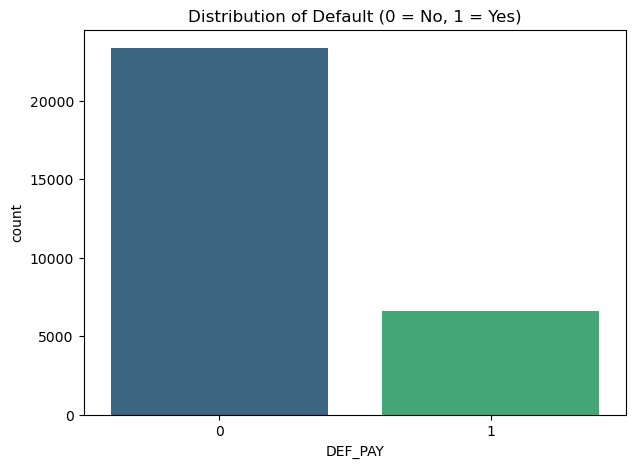

Target Variable Percentages:
DEF_PAY
0    77.88
1    22.12
Name: proportion, dtype: float64


In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum().sum()) # Should be 0

# Check the balance of our Target Variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.countplot(x='DEF_PAY', data=df, palette='viridis')
plt.title('Distribution of Default (0 = No, 1 = Yes)')
plt.show()

# Print exact percentages
print("Target Variable Percentages:")
print(df['DEF_PAY'].value_counts(normalize=True) * 100)

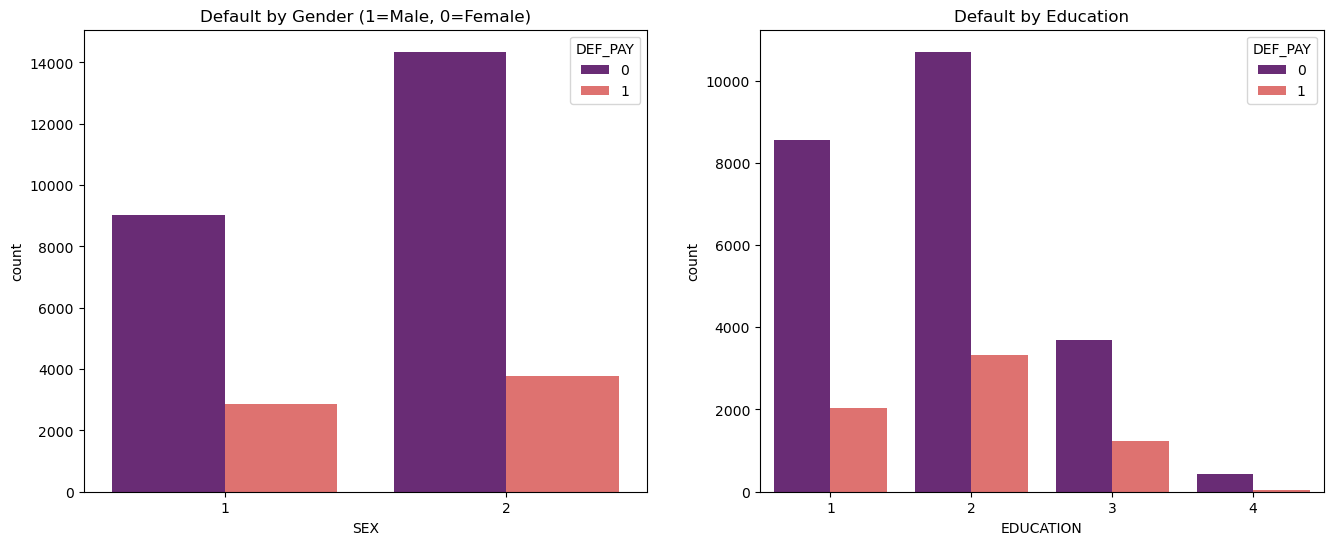

In [9]:
# Set up a grid for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Default by Gender (1=Male, 0=Female)
sns.countplot(x='SEX', hue='DEF_PAY', data=df, ax=axes[0], palette='magma')
axes[0].set_title('Default by Gender (1=Male, 0=Female)')

# Plot 2: Default by Education
sns.countplot(x='EDUCATION', hue='DEF_PAY', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Default by Education')

plt.show()

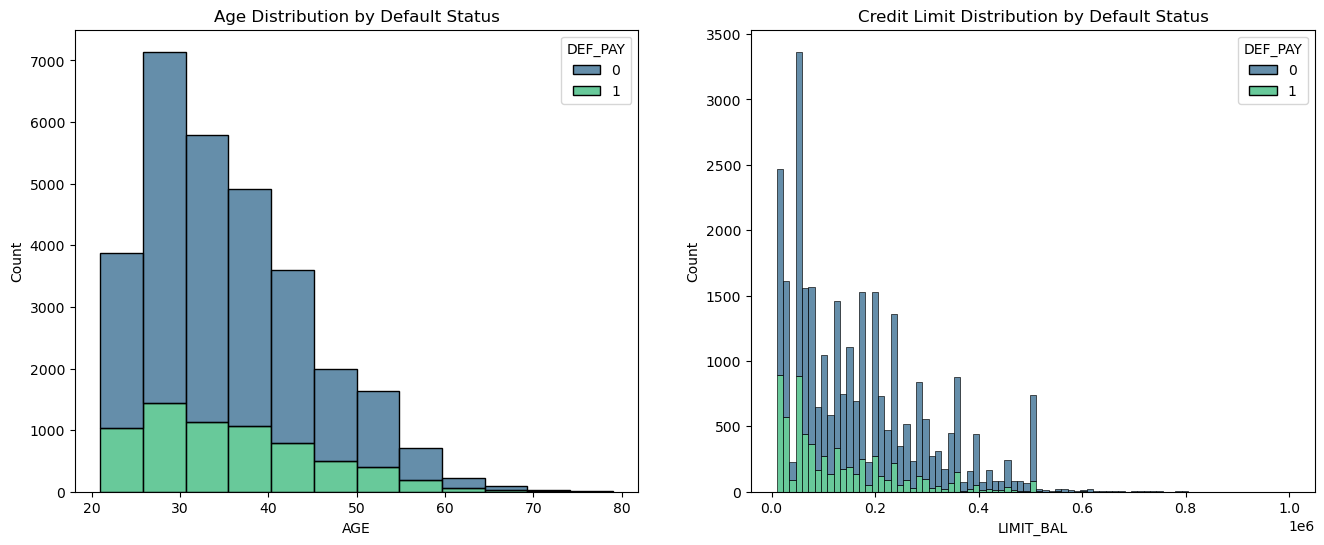

In [10]:
# Set up a grid for distribution plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Age Distribution by Default
sns.histplot(data=df, x='AGE', hue='DEF_PAY', binwidth=5, multiple='stack', ax=axes[0], palette='viridis')
axes[0].set_title('Age Distribution by Default Status')

# Plot 2: Limit Balance Distribution by Default
sns.histplot(data=df, x='LIMIT_BAL', hue='DEF_PAY', multiple='stack', ax=axes[1], palette='viridis')
axes[1].set_title('Credit Limit Distribution by Default Status')

plt.show()

In [11]:
# Save the cleaned dataframe to the processed folder
processed_path = '../data/processed/credit_card_cleaned.csv'
df.to_csv(processed_path, index=False)

print(f"Cleaned data saved to: {processed_path}")

Cleaned data saved to: ../data/processed/credit_card_cleaned.csv


In [12]:
import sqlite3

# 1. Create a connection to an in-memory database
conn = sqlite3.connect(':memory:')

# 2. Write the DataFrame to a SQL table named 'credit_risk'
df.to_sql('credit_risk', conn, index=False, if_exists='replace')

print("SQL Environment Ready! Your table name is: 'credit_risk'")

SQL Environment Ready! Your table name is: 'credit_risk'


In [13]:
# SQL Query: Calculate Default Rate by Payment Status
query = """
SELECT 
    PAY_1 AS Payment_Status,
    COUNT(*) AS Total_Customers,
    SUM(DEF_PAY) AS Total_Defaults,
    ROUND(AVG(DEF_PAY) * 100, 2) AS Default_Rate_Percentage
FROM credit_risk
WHERE PAY_1 > 0  -- Focusing only on those with delays
GROUP BY PAY_1
ORDER BY PAY_1;
"""

# Execute the query and load results back into a DataFrame for display
risk_by_payment = pd.read_sql_query(query, conn)
display(risk_by_payment)

,Payment_Status,Total_Customers,Total_Defaults,Default_Rate_Percentage
0,1,3688,1252,33.95
1,2,2667,1844,69.14
2,3,322,244,75.78
3,4,76,52,68.42
4,5,26,13,50.00
5,6,11,6,54.55
6,7,9,7,77.78
7,8,19,11,57.89


In [14]:
# SQL Query: Impact of Credit Utilization on Default
utilization_query = """
SELECT 
    CASE 
        WHEN (BILL_AMT1 * 1.0 / LIMIT_BAL) <= 0.2 THEN '0-20% (Low)'
        WHEN (BILL_AMT1 * 1.0 / LIMIT_BAL) <= 0.5 THEN '20-50% (Medium)'
        WHEN (BILL_AMT1 * 1.0 / LIMIT_BAL) <= 0.8 THEN '50-80% (High)'
        WHEN (BILL_AMT1 * 1.0 / LIMIT_BAL) <= 1.0 THEN '80-100% (Very High)'
        ELSE '100%+ (Overlimit)'
    END AS Utilization_Bucket,
    COUNT(*) AS Total_Customers,
    ROUND(AVG(DEF_PAY) * 100, 2) AS Default_Rate_Percentage
FROM credit_risk
GROUP BY Utilization_Bucket
ORDER BY Default_Rate_Percentage ASC;
"""

utilization_results = pd.read_sql_query(utilization_query, conn)
display(utilization_results)

,Utilization_Bucket,Total_Customers,Default_Rate_Percentage
0,0-20% (Low),13255,18.29
1,20-50% (Medium),4371,21.07
2,80-100% (Very High),5865,25.52
3,50-80% (High),4394,26.33
4,100%+ (Overlimit),2115,30.07


In [15]:
# SQL Query: Identifying 'Minimum Payers'
min_pay_query = """
SELECT 
    CASE 
        WHEN PAY_AMT1 >= BILL_AMT1 AND BILL_AMT1 > 0 THEN 'Paid in Full'
        WHEN PAY_AMT1 < (BILL_AMT1 * 0.2) AND BILL_AMT1 > 0 THEN 'Paid < 20% (Low Payment)'
        WHEN BILL_AMT1 <= 0 THEN 'No Balance'
        ELSE 'Partial Payment'
    END AS Payment_Behavior,
    COUNT(*) AS Total_Customers,
    ROUND(AVG(DEF_PAY) * 100, 2) AS Default_Rate_Percentage
FROM credit_risk
GROUP BY Payment_Behavior;
"""

min_pay_results = pd.read_sql_query(min_pay_query, conn)
display(min_pay_results)

,Payment_Behavior,Total_Customers,Default_Rate_Percentage
0,No Balance,2598,24.75
1,Paid < 20% (Low Payment),19678,24.16
2,Paid in Full,3871,15.50
3,Partial Payment,3853,16.56
